In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [50]:
data=pd.read_csv('E:\python_3\knn.csv')
data.head(10)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


In [51]:
real_x=data.iloc[:,[1,2]].values
real_y=data.iloc[:,3].values

In [115]:
training_x,test_x,training_y,test_y = train_test_split(real_x,real_y,test_size =0.25, random_state=0)
test_x

array([[178, 154],
       [183, 147],
       [166, 107],
       [159, 140],
       [152, 132],
       [153, 107],
       [188,  99],
       [179, 150],
       [181, 105],
       [168, 140],
       [166,  61],
       [153,  70],
       [167,  58],
       [149, 100],
       [174, 138],
       [185, 102],
       [161, 115],
       [174,  90],
       [155, 111],
       [144,  80],
       [150,  87],
       [185,  94],
       [178,  85],
       [181, 106],
       [185,  76],
       [188,  65],
       [153, 149],
       [186, 127],
       [142,  69],
       [177,  81],
       [153,  77],
       [144, 108],
       [158, 149],
       [154, 100],
       [174,  95],
       [198,  50],
       [180, 156],
       [172,  90],
       [184, 153],
       [174,  65],
       [153, 104],
       [188, 122],
       [169, 110],
       [183, 138],
       [165, 104],
       [189,  87],
       [196, 159],
       [148,  54],
       [162, 130],
       [161, 155],
       [195, 147],
       [187, 136],
       [179,

In [116]:
s_c=StandardScaler()
training_x = s_c.fit_transform(training_x)
test_x = s_c.fit_transform(test_x)

In [117]:
cls = KNeighborsClassifier(n_neighbors= 5, metric='minkowski',p=2)
cls.fit(training_x,training_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [118]:
y_pred=cls.predict(test_x)
y_pred

array([5, 5, 4, 5, 5, 5, 3, 5, 3, 5, 2, 3, 2, 5, 5, 3, 5, 2, 5, 4, 4, 3,
       2, 4, 2, 1, 5, 4, 4, 2, 3, 5, 5, 5, 4, 0, 5, 4, 5, 1, 5, 4, 4, 4,
       4, 2, 5, 2, 5, 5, 4, 4, 2, 4, 5, 3, 4, 4, 0, 4, 4, 4, 4, 1, 4, 3,
       2, 3, 5, 5, 5, 5, 3, 4, 4, 5, 4, 5, 5, 5, 4, 3, 4, 5, 5, 2, 5, 5,
       5, 3, 2, 2, 2, 0, 3, 0, 4, 4, 0, 3, 5, 5, 4, 3, 5, 5, 2, 5, 4, 4,
       4, 5, 3, 2, 5, 5, 5, 4, 4, 5, 2, 5, 5, 4, 5], dtype=int64)

In [119]:
test_y

array([5, 5, 4, 5, 5, 5, 3, 5, 4, 5, 2, 3, 2, 5, 5, 3, 5, 3, 5, 4, 4, 3,
       3, 4, 2, 1, 5, 4, 4, 3, 4, 5, 5, 5, 4, 0, 5, 4, 5, 2, 5, 4, 4, 5,
       4, 2, 5, 2, 5, 5, 4, 4, 3, 5, 5, 3, 4, 4, 0, 4, 4, 4, 4, 1, 4, 4,
       2, 3, 5, 4, 5, 5, 3, 4, 4, 5, 4, 4, 5, 5, 5, 3, 4, 5, 5, 2, 5, 5,
       5, 4, 2, 2, 3, 1, 3, 1, 4, 4, 0, 3, 5, 5, 4, 3, 5, 5, 2, 5, 4, 4,
       4, 5, 3, 3, 5, 5, 5, 4, 4, 5, 2, 5, 5, 5, 5], dtype=int64)

In [120]:
c_m = confusion_matrix(test_y,y_pred)
c_m

array([[ 3,  0,  0,  0,  0,  0],
       [ 2,  2,  0,  0,  0,  0],
       [ 0,  1, 11,  0,  0,  0],
       [ 0,  0,  6, 12,  0,  0],
       [ 0,  0,  0,  4, 32,  2],
       [ 0,  0,  0,  0,  4, 46]], dtype=int64)

In [159]:
from matplotlib.colors import ListedColormap
x_set,y_set=training_x,training_y
x1,x2=np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop =x_set[:, 0].max() +1, step=0.01),
                  np.arange(start = x_set[:, 1].min() -1, stop =x_set[:, 1].max() +1, step=0.01))
plt.contourf(x1, x2, cls.predict(np.array[x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
   alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c = ListedColormap(('red','green'))(i), label =j)
plt.title('K-NN(Training Set)')    
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

IndentationError: unexpected indent (<ipython-input-159-e0504c9e6a93>, line 6)

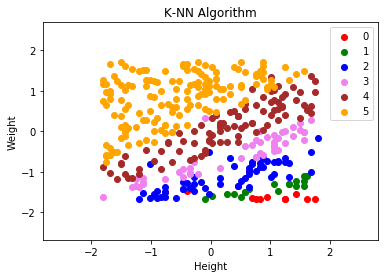

In [163]:
from matplotlib.colors import ListedColormap
x_set,y_set=training_x,training_y
x1,x2=np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop =x_set[:, 0].max() +1, step=0.01),
                  np.arange(start = x_set[:, 1].min() -1, stop =x_set[:, 1].max() +1, step=0.01))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c = ListedColormap(('red','green','blue','violet','brown','orange'))(i), label =j)
plt.title('K-NN Algorithm')    
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()